#Actividad 1 y 2 Módulo 7

#Ejercicio Guiado: Clasificación de prendas de vestir

La empresa Mnist Fashion cuenta con 60.000 imágenes para ser entrenadas y cuenta con otras 10.000 imágenes que sirven para evaluar la precisión de nuestro modelo en clasificar las prendas, cabe resaltar que todas las imágenes están con una dimensión de 28 por 28px y tenemos 10 tipos de clases de ellas, donde podemos encontrar abrigos, poleras, zapatillas, tacones, entre otros.

1. Instale el ambiente de Tensorflow
2. Carga de la data
3. Descripción de la base de datos
4. Configuración de la red neuronal
5. Compilación de la red neuronal
6. Entrenamiento de la red
7. Predicción y conclusión.

https://medium.com/@joel_epping/entrenar-una-red-neuronal-para-la-
clasificaci%C3%B3n-de-prendas-de-vestir-usando-tensorflow-2-0-eace7441be06

In [ ]:
!pip install tensorflow==2.12.0

In [21]:
import os

import tensorflow as tf
from tensorflow import keras
#Usaremos datetime para nombrar archivos
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import requests
from io import BytesIO
# lo usaremos para reescalar imagen
import cv2
#verficamos la version de tensorflow tf 2.0
print(tf.__version__)

2.12.0


In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [27]:
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

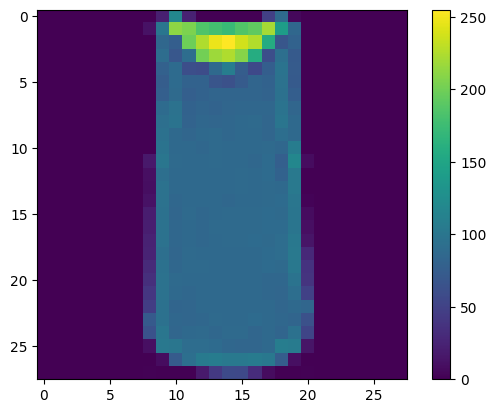

In [8]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

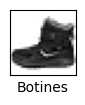

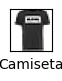

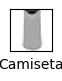

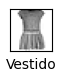

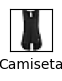

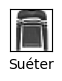

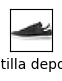

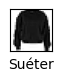

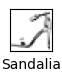

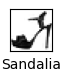

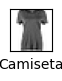

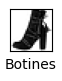

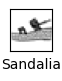

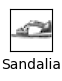

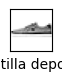

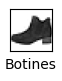

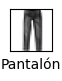

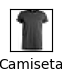

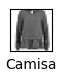

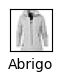

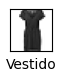

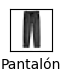

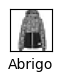

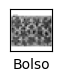

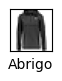

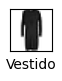

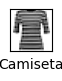

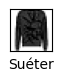

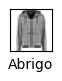

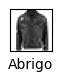

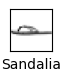

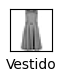

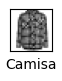

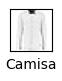

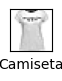

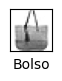

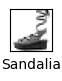

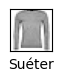

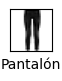

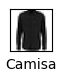

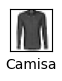

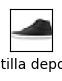

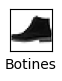

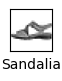

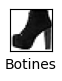

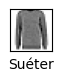

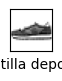

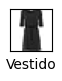

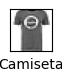

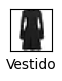

In [28]:
plt.figure(figsize=(10,10))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.show()

In [11]:
train_images = train_images / 255
test_images = test_images / 255

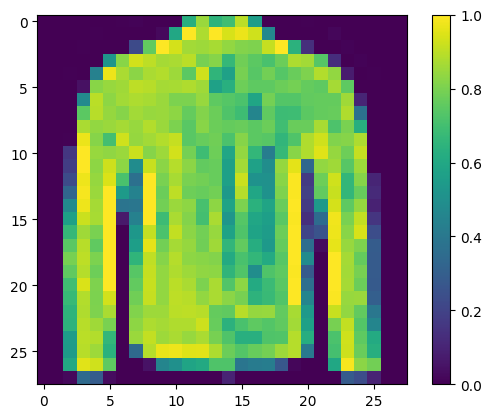

In [12]:
plt.figure()
plt.imshow(test_images[50])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28,28)),
 keras.layers.Dense(150, activation=tf.nn.relu),
 keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer = 'adam',
loss ='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 10)                1510      
                                                                 
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(train_images,
train_labels,
epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4955 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3719 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3322 - accuracy: 0.8797
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3103 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2918 - accuracy: 0.8935
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2766 - accuracy: 0.8981
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2645 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2517 - accuracy: 0.9063
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2435 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.233

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3409 - accuracy: 0.8804
Test accuracy: 0.8804000020027161


In [22]:
target_dir = '/modelo/'
if not os.path.exists(target_dir):
 os.mkdir(target_dir)
model.save('./modelo/modelo.h5')
model.save_weights('./modelo/pesos.h5')
model_file = 'model_trained.h5'
tf.keras.models.save_model(model, model_file)

In [23]:
predictions = model.predict(test_images)
img_predict = predictions[30]

313/313 [==============================] - 0s 1ms/step


In [24]:
img_predict =predictions[30]
print(img_predict)

[2.4399496e-11 7.8265671e-18 8.0278673e-17 4.0443991e-19 1.5349316e-11
 6.8484753e-12 1.1876794e-14 1.9226011e-11 9.9999994e-01 2.1629474e-17]


In [25]:
np.argmax(img_predict)

8

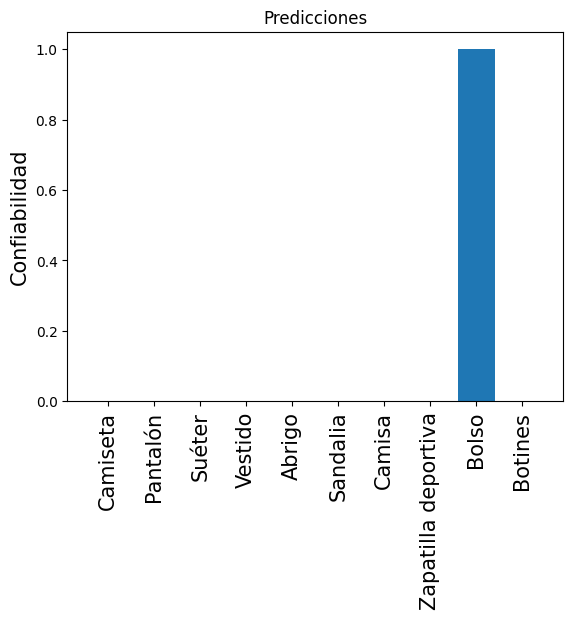

In [29]:
index = np.arange(len(class_names))
plt.bar(index, img_predict)
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title('Predicciones')
plt.show()

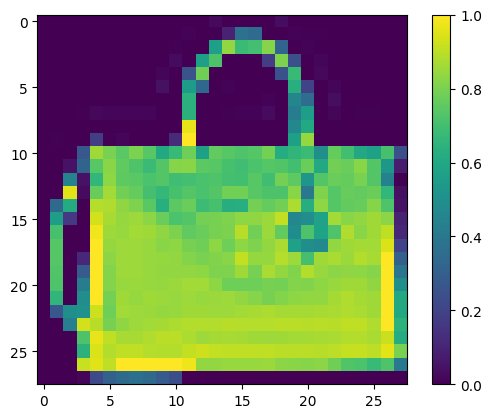

In [30]:
plt.figure()
plt.imshow(test_images[30])
plt.colorbar()
plt.grid(False)
plt.show()